### Real Data 'C:\Users\dell\Desktop\Python\week12\Folder\flowers' bu qovludadir. 'flowers' ovlugunda 'daisy', 'dandelion', 'rose', 'sunflower', 'tulip' qovlugu var. Her qovluqdada  sekiller var

### Colab bu datani komputerden ceke bilmir. Datani google drive yuklemek lazimidr.
### Bu kod parçası, Google Colab-də Google Drive-ı mount etməyə (bağlamağa) imkan verir. Google Drive-ı mount etdikdən sonra, Drive-da olan faylları oxumaq və ya yazmaq mümkündür.

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Google Drive-de faylin yolunu tapmaq

In [54]:
import os

# Drive-da faylları siyahılayın
for root, dirs, files in os.walk('/content/drive/My Drive'):
    # for file in files:
    #     # print(os.path.join(root, file))
    print(root)

/content/drive/My Drive
/content/drive/My Drive/Colab Notebooks
/content/drive/My Drive/Data_sets
/content/drive/My Drive/Folder
/content/drive/My Drive/Folder/flowers
/content/drive/My Drive/Folder/flowers/sunflower
/content/drive/My Drive/Folder/flowers/daisy
/content/drive/My Drive/Folder/flowers/rose
/content/drive/My Drive/Folder/flowers/tulip
/content/drive/My Drive/Folder/flowers/dandelion


### Plot Pictures

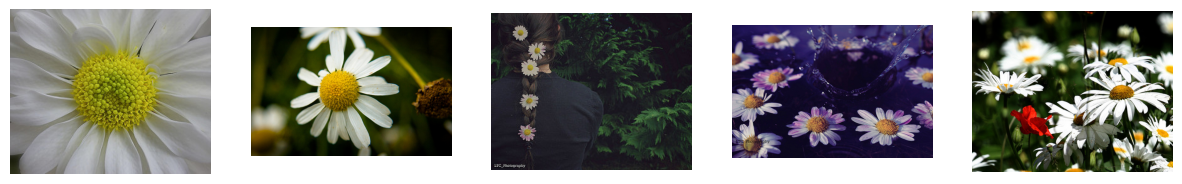

In [19]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Datasetin əsas yolunu göstəririk
path = r"/content/drive/My Drive/Folder"
data_path = os.path.join(path, "flowers")

# Şəkilləri yükləyəcəyimiz sinifi seçirik (məsələn, "daisy")
category = 'daisy'  # Burada kateqoriyanı dəyişə bilərsiniz
image_folder = os.path.join(data_path, category)

# İlk 5 şəkili yükləyirik
image_files = os.listdir(image_folder)[:5]  # İlk 5 şəkil

# Şəkilləri göstəririk
plt.figure(figsize=(15, 10))  # Şəkillərin ölçüsünü təyin edirik
for i, image_file in enumerate(image_files):
    image_path = os.path.join(image_folder, image_file)
    image = Image.open(image_path)

    # Şəkli subplot-da göstəririk
    plt.subplot(1, 5, i + 1)  # 1 sıra və 5 sütunlu subplot
    plt.imshow(image)
    plt.axis('off')

plt.show()

### Train vs Test Data Preperation

In [20]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Datasetin kök yolu
data_dir = path + "/flowers"

# Hər iki set üçün transformasiyalar (resize, normalize və s.)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # CNN üçün ölçünü uyğunlaşdırırıq
    transforms.ToTensor(),  # Tensor formatına çeviririk
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Pretrained model üçün
])

# Datasetin yüklənməsi
# ImageFolder avtomatik her qovluqda olan sekillere qovluq adina uygun label teyin edir
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# DataLoader-ların yaradılması
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Datasetin label-ləri (bu adlar sırasına görə etiketlənəcək)
class_names = dataset.classes
print("Class names:", class_names)

# Dataset ölçüləri
print("Train set size:", len(train_dataset))
print("Test set size:", len(test_dataset))

Class names: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Train set size: 3458
Test set size: 865


### Hər dövr üçün alınan 'images' tensorunun ölçülərini

In [21]:
# train_loader-dən görüntü və etiketləri əldə etmək üçün dövr yaradırıq
for images, labels in train_loader:
    # Hər dövr üçün alınan 'images' tensorunun ölçülərini çap edirik
    print(images.shape)
    # İlk dövrün sonunda dövrü dayandırırıq, çünki yalnız bir partiya (batch) göstərmək istəyirik
    break

torch.Size([32, 3, 224, 224])


### efficientnet-pytorch Coalb-a yuklemek

In [22]:
# !pip install efficientnet-pytorch

### Use Ready Model EfficientNet

In [27]:
import torch
import torch.nn as nn
from efficientnet_pytorch import EfficientNet
import torchvision.models as models

# Modelin yüklənməsi (EfficientNetmisalı)
model = EfficientNet.from_pretrained('efficientnet-b0')

# Son təbəqəni dəyişirik (fully connected layer)
num_ftrs = model._fc.in_features
model._fc = nn.Linear(num_ftrs, len(class_names))  # `len(class_names)` bizim etiket sayı olacaq

# Modeli cihazınıza (GPU/CPU) yükləyin
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Modelin strukturu
print(model)

Loaded pretrained weights for efficientnet-b0
EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d((0, 1, 0, 1))
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kern

### CrossEntropyLoss vs Adam Optimzation vs Train Stage

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Optimizer və Loss funksiyası
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Modelin təlimi
epochs = 10  # Təlim dövr sayını təyin edin
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # Optimizerın grad-larını sıfırlayırıq
        outputs = model(images)
        loss = criterion(outputs, labels)  # Hədəf və modelin çıxışı arasındakı itki
        loss.backward()  # Grad-ları geri yayırıq
        optimizer.step()  # Optimizer bir addım irəliləyir

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct/total:.2f}%")

Epoch [1/10], Loss: 0.4466, Accuracy: 84.47%
Epoch [2/10], Loss: 0.2422, Accuracy: 92.63%
Epoch [3/10], Loss: 0.1657, Accuracy: 94.56%
Epoch [4/10], Loss: 0.1732, Accuracy: 94.51%
Epoch [5/10], Loss: 0.1099, Accuracy: 96.93%
Epoch [6/10], Loss: 0.1297, Accuracy: 95.95%
Epoch [7/10], Loss: 0.0892, Accuracy: 97.05%
Epoch [8/10], Loss: 0.0611, Accuracy: 98.15%
Epoch [9/10], Loss: 0.0608, Accuracy: 98.18%
Epoch [10/10], Loss: 0.0822, Accuracy: 97.72%


### Evolution stage

In [29]:
model.eval()  # Modeli qiymətləndirmə rejiminə keçiririk
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Validation Accuracy: {100 * correct/total:.2f}%")

Validation Accuracy: 92.95%


### Metrics

In [30]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score,\
                                                                                                    confusion_matrix

model.eval() # Modeli qiymətləndirmə rejiminə keçirir
all_labels = [] # Test dəstindəki həqiqi etiketləri saxlamaq üçün boş siyahı
all_predictions = [] # Modelin təxmin etdiyi etiketləri saxlamaq üçün boş siyahı

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images) # Test məlumatlarını modeldən keçirir
        _, predicted = torch.max(outputs, 1) # Hər bir nümunə üçün ehtimalı ən yüksək olan sinifi seçir
        all_labels.extend(labels.cpu().numpy()) # Həqiqi etiketləri siyahıya əlavə edir
        all_predictions.extend(predicted.cpu().numpy()) # Təxminləri siyahıya əlavə edir

# Metrikləri hesablamaq
accuracy = accuracy_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
conf_matrix = confusion_matrix(all_labels, all_predictions)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'F1 Score: {f1:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(all_labels, all_predictions))

Accuracy: 92.95%
F1 Score: 0.93
Recall: 0.93
Precision: 0.93
Confusion Matrix:
 [[120   5   2   3   3]
 [  2 224   0   0   2]
 [  2   2 146   1  12]
 [  3   2   0 141   3]
 [  2   2  11   4 173]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       133
           1       0.95      0.98      0.97       228
           2       0.92      0.90      0.91       163
           3       0.95      0.95      0.95       149
           4       0.90      0.90      0.90       192

    accuracy                           0.93       865
   macro avg       0.93      0.93      0.93       865
weighted avg       0.93      0.93      0.93       865



### Sekili komputerden Colab-a yuklemek methodu

In [31]:
from google.colab import files
uploaded = files.upload()

Saving rose.jpg to rose.jpg


### Forecast

In [33]:
from PIL import Image
import torchvision.transforms as transforms
import torch

# FashionMNIST sinif adları
class_names = dataset.classes

# Şəkli yükləyin və modelin gözlədiyi ölçüyə və formata çevirin
image_path = r'rose.jpg'
image = Image.open(image_path).convert("RGB")  # 3 kanal (RGB) formatına çevir

# Transformasiyanı tətbiq et
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Modelin gözlədiyi ölçüyə çevirir
    transforms.ToTensor(),          # Tensora çevirir
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalizasiya (pretrained model üçün)
])

# Şəkli tensora çevir və batch ölçüsünü (1, 3, 224, 224) kimi göstər
image_tensor = transform(image).unsqueeze(0)  # Batch ölçüsünü əlavə edirik (1, 3, 224, 224)

# Cihaza göndəririk (GPU və ya CPU)
image_tensor = image_tensor.to(device)

# Modeli qiymətləndirmək (eval mode)
model.eval()

# Modelin proqnozunu alın
with torch.no_grad():
    output = model(image_tensor)  # Şəkli modeldən keçiririk
    _, predicted_class = torch.max(output, 1)  # Ehtimalı ən yüksək olan sinifi seçirik

# Proqnoz nəticəsini sinif adı ilə göstər
predicted_class_name = class_names[predicted_class.item()]
print(f"Modelin proqnozu: Sinif: {predicted_class.item()} ; Adı: {predicted_class_name}")

Modelin proqnozu: Sinif: 2 ; Adı: rose


### Check Forecast

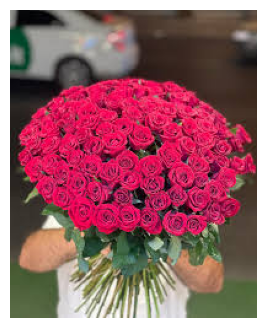

In [34]:

from PIL import Image
import matplotlib.pyplot as plt

# Şəkili açın və göstərmək üçün plt.imshow funksiyasına verin
image_path = r"rose.jpg"
image = Image.open(image_path)

plt.figure(figsize=(4,4))
plt.imshow(image)
plt.axis("off")  # Oxları gizlətmək üçün
plt.show()